# Credit Card Default Risk - Prediction

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras

In [2]:
# import warings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

In [4]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

customer_id          name  age gender owns_car owns_house  no_of_children  \
0  CST_142525          Siva   52      F        Y          N             0.0   
1  CST_129215         Scott   48      F        N          N             1.0   
2  CST_138443      Victoria   50      F        N          N             1.0   
3  CST_123812  John McCrank   30      F        N          N             1.0   
4  CST_144450      Martinne   52      M        N          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          232640.53                998.0         Unknown   
1          284396.79               1338.0         Unknown   
2          149419.28               1210.0         Unknown   
3          160437.54                503.0        Laborers   
4          233480.37                157.0        Laborers   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   2.0             0.0              14406.73      26524.40   
1                   3.0             0.0              57479.99      68998.72   
2                   3.0             0.0              21611.01      25187.80   
3                   2.0             1.0              28990.76      29179.39   
4                   2.0             1.0              54213.72      82331.82   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  
0                     4         779.0              0                        0  
1                    70         806.0              0                        0  
2                    71         528.0              2                        0  
3                     9         815.0              0                        0  
4                    82         613.0              1                        1

### Inspect data and treat data

In [5]:
# check shape and length
print(train_data.shape)
print(len(train_data))

(45528, 19)
45528


In [6]:
print(test_data.shape)
print(len(test_data))

(11383, 18)
11383


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [8]:
# check for null values
train_data.isna().mean()*100

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.201458
owns_house                 0.000000
no_of_children             1.700053
net_yearly_income          0.000000
no_of_days_employed        1.016957
occupation_type            0.000000
total_family_members       0.182305
migrant_worker             0.191091
yearly_debt_payments       0.208663
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.017572
prev_defaults              0.000000
default_in_last_6months    0.000000
credit_card_default        0.000000
dtype: float64

In [9]:
train_data.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

Check for data imbalance

In [10]:
# check data imbalance
train_data.credit_card_default.value_counts(normalize=True)*100

0    91.879722
1     8.120278
Name: credit_card_default, dtype: float64

In [11]:
train_data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

In [12]:
# get all categorical features
cols = train_data.columns 

for i in cols:
    if len(train_data[i].value_counts())<=20:
        print("Column Name:",i)
        print(train_data[i].value_counts())
        print("*"*50)

Column Name: gender
F      29957
M      15570
XNA        1
Name: gender, dtype: int64
**************************************************
Column Name: owns_car
N    29743
Y    15238
Name: owns_car, dtype: int64
**************************************************
Column Name: owns_house
Y    31642
N    13886
Name: owns_house, dtype: int64
**************************************************
Column Name: no_of_children
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
8.0        1
7.0        1
9.0        1
Name: no_of_children, dtype: int64
**************************************************
Column Name: occupation_type
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              9

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
<br>
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

In [13]:
train_data.isna().sum().sort_values(ascending=False).head(10)

no_of_children             774
owns_car                   547
no_of_days_employed        463
yearly_debt_payments        95
migrant_worker              87
total_family_members        83
credit_score                 8
customer_id                  0
default_in_last_6months      0
prev_defaults                0
dtype: int64

In [14]:
train_data[train_data['gender'] == 'XNA']

customer_id    name  age gender owns_car owns_house  no_of_children  \
28498  CST_144669  ernard   52    XNA        N          Y             2.0   

       net_yearly_income  no_of_days_employed     occupation_type  \
28498          203596.95               2806.0  Low-skill Laborers   

       total_family_members  migrant_worker  yearly_debt_payments  \
28498                   4.0             0.0               14700.2   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
28498      65487.34                    40         669.0              0   

       default_in_last_6months  credit_card_default  
28498                        0                    0

In [15]:
# change it to M as the name pronunces as Male
train_data['gender'] = train_data['gender'].apply(lambda x: 'M' if x=='XNA' else x)
train_data['gender'].value_counts()

F    29957
M    15571
Name: gender, dtype: int64

impute <i>no_of_children</i> using mode of the data

In [16]:
# fill no_of_children with mode of the data
train_data['no_of_children'].fillna(train_data['no_of_children'].mode()[0], inplace=True)

impute <i>owns_car</i> using mode of the data

In [17]:
# fill owns_car with mode of the data
train_data['owns_car'].fillna(train_data['owns_car'].mode()[0], inplace=True)

impute <i>no_of_days_employed</i> using Median based on <i>occupation_type</i> of the data

In [18]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = train_data.groupby(by='occupation_type')['no_of_days_employed'].median()
occp_days_employed

occupation_type
Accountants                1822.0
Cleaning staff             1509.0
Cooking staff              1429.5
Core staff                 1883.0
Drivers                    1342.0
HR staff                   1528.0
High skill tech staff      1728.0
IT staff                   1747.0
Laborers                   1687.0
Low-skill Laborers          983.0
Managers                   2118.0
Medicine staff             2826.0
Private service staff      1718.0
Realty agents              1390.0
Sales staff                1276.0
Secretaries                2001.5
Security staff             1419.0
Unknown                  365241.0
Waiters/barmen staff       1258.0
Name: no_of_days_employed, dtype: float64

In [19]:
occp_days_employed['Accountants']

1822.0

In [20]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
for i in occp_days_employed.index:
    train_data['no_of_days_employed'] = np.where((train_data['no_of_days_employed'].isna()) & (train_data['occupation_type'] == i), occp_days_employed[i], train_data['no_of_days_employed'])

In [21]:
train_data.no_of_days_employed.isna().sum()

0

In [22]:
train_data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

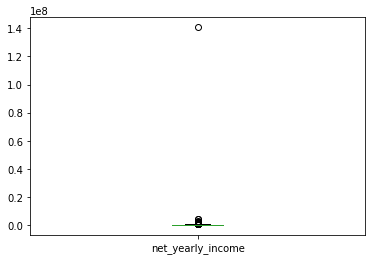

In [23]:
# Lets create bins for net_yearly_income
# boxplot of net_yearly_income

train_data.net_yearly_income.plot.box()
plt.show()

In [24]:
train_data.net_yearly_income.quantile([0.25, 0.5, 0.75, 0.99, 1.00])

0.25    1.263458e+05
0.50    1.717149e+05
0.75    2.406038e+05
0.99    5.779015e+05
1.00    1.407590e+08
Name: net_yearly_income, dtype: float64

In [25]:
train_data[train_data.net_yearly_income > train_data.net_yearly_income.quantile(0.99)]

customer_id              name  age gender owns_car owns_house  \
15     CST_106781  Lesley Wroughton   37      F        N          N   
150    CST_144508             Kevin   43      M        N          Y   
237    CST_134049            Alison   34      M        Y          Y   
335    CST_117197   Alison Griswold   37      M        Y          Y   
347    CST_130343              John   33      M        N          Y   
...           ...               ...  ...    ...      ...        ...   
45158  CST_147033            Kihara   33      M        Y          N   
45233  CST_116873  Alexei Oreskovic   43      M        Y          Y   
45296  CST_131492             Sarah   42      F        N          Y   
45365  CST_111037         asil Katz   32      F        Y          N   
45386  CST_133631             David   33      M        Y          Y   

       no_of_children  net_yearly_income  no_of_days_employed  \
15                0.0          746959.12               2229.0   
150               0.0          610226.68               3251.0   
237               0.0          649425.86                505.0   
335               0.0          879553.84               2279.0   
347               3.0          600445.87               2110.0   
...               ...                ...                  ...   
45158             2.0          984019.98               2488.0   
45233             0.0          694994.90               5564.0   
45296             2.0          822367.44                318.0   
45365             0.0          866722.07               7194.0   
45386             0.0          963669.25               4160.0   

             occupation_type  total_family_members  migrant_worker  \
15                   Unknown                   2.0             0.0   
150                 Managers                   2.0             0.0   
237                 Managers                   2.0             0.0   
335                 Managers                   1.0             0.0   
347                 Managers                   5.0             1.0   
...                      ...                   ...             ...   
45158                Unknown                   4.0             1.0   
45233               Managers                   2.0             0.0   
45296  High skill tech staff                   4.0             0.0   
45365               Managers                   2.0             0.0   
45386               Managers                   2.0             1.0   

       yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
15                 16834.71     188438.82                    63         666.0   
150                48463.33     148288.36                    78         823.0   
237                57770.89      73137.97                    44         871.0   
335                52839.41     194618.06                    74         503.0   
347                     NaN     148313.03                    40         774.0   
...                     ...           ...                   ...           ...   
45158              72571.25     315461.88                    29         789.0   
45233              21687.67     113084.03                    39         846.0   
45296              97654.32     283544.16                    38         697.0   
45365              62775.26     189329.45                    11         803.0   
45386              54304.52     258464.20                    83         775.0   

       prev_defaults  default_in_last_6months  credit_card_default  
15                 0                        0                    0  
150                0                        0                    0  
237                0                        0                    0  
335                1                        0                    1  
347                0                        0                    0  
...              ...                      ...                  ...  
45158              0                        0                    0  
45233 

In [26]:
# Lets drop the data above 99%ile 
train_data = train_data[train_data.net_yearly_income <= train_data.net_yearly_income.quantile(0.99)]
train_data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

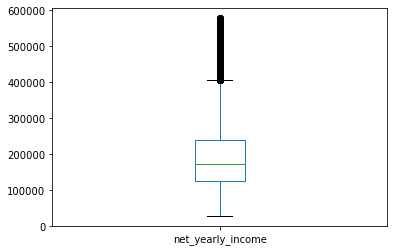

In [27]:
train_data.net_yearly_income.plot.box()
plt.show()

In [28]:
train_data.net_yearly_income.quantile([0.25, 0.5, 0.75, 0.99, 1.00])

0.25    125824.5050
0.50    170968.0300
0.75    237768.9200
0.99    494553.0015
1.00    577850.1200
Name: net_yearly_income, dtype: float64

In [29]:
# binning of net_yearly_income into categories
def income_binning(x):
    if x <= 125824.5050:
        return 'Low'
    elif x > 125824.5050 and x <= 170968.0300:
        return 'Below Avg'
    elif x > 170968.0300 and x <= 237768.9200:
        return 'Above Avg'
    else:
        return 'High'


In [30]:
train_data['income_categories'] = train_data.net_yearly_income.apply(income_binning)

In [31]:
train_data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default income_categories  
0                    1               Low  
1                    0               Low  
2                    0         Above Avg  
3                    0               Low  
4                    0              High

In [32]:
# 

impute <i>yearly_debt_payments</i> using Median based on <i>credit_card_default</i> of the data

In [33]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = train_data.groupby(by='credit_card_default')['yearly_debt_payments'].median()
yearDebt_credit

credit_card_default
0    28942.95
1    29068.55
Name: yearly_debt_payments, dtype: float64

In [34]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
for i in yearDebt_credit.index:
    train_data['yearly_debt_payments'] = np.where((train_data['yearly_debt_payments'].isna()) & (train_data['credit_card_default'] == i), yearDebt_credit[i], train_data['yearly_debt_payments'])

In [35]:
train_data['yearly_debt_payments'].isna().sum()

0

Let's check any more null values pending in features

In [36]:
train_data.isna().sum().sort_values(ascending=False).head(10)

migrant_worker             85
total_family_members       83
credit_score                8
name                        0
credit_card_default         0
default_in_last_6months     0
prev_defaults               0
credit_limit_used(%)        0
credit_limit                0
yearly_debt_payments        0
dtype: int64

impute <i>migrant_worker</i> using Mode of the data

In [37]:
train_data['migrant_worker'].mode()[0]

0.0

In [38]:
# imputing with mode of the data
train_data['migrant_worker'].fillna(train_data['migrant_worker'].mode()[0], inplace=True)

# check null values count
train_data['migrant_worker'].isna().sum()

0

impute <i>total_family_members</i> using Mode of the data

In [39]:
train_data['total_family_members'].mode()[0]

2.0

In [40]:
# imputing with mode of the data
train_data['total_family_members'].fillna(train_data['total_family_members'].mode()[0], inplace=True)

# check null values count
train_data['total_family_members'].isna().sum()

0

impute <i>credit_score</i> using Median based on <i>credit_card_default</i> of the data

In [41]:
# check medians of credit_score wrt credit_card_default
cred_score = train_data.groupby(by='credit_card_default')['credit_score'].median()
cred_score

credit_card_default
0    799.0
1    599.0
Name: credit_score, dtype: float64

In [42]:
# impute 'credit_score' with median based on 'credit_card_default'
for i in cred_score.index:
    train_data['credit_score'] = np.where((train_data['credit_score'].isna()) & (train_data['credit_card_default'] == i), cred_score[i], train_data['credit_score'])

# check for null values in 'credit_score'
train_data['credit_score'].isna().sum()

0

**Check for Null values in the Data Set**

In [43]:
train_data.isna().mean()*100

customer_id                0.0
name                       0.0
age                        0.0
gender                     0.0
owns_car                   0.0
owns_house                 0.0
no_of_children             0.0
net_yearly_income          0.0
no_of_days_employed        0.0
occupation_type            0.0
total_family_members       0.0
migrant_worker             0.0
yearly_debt_payments       0.0
credit_limit               0.0
credit_limit_used(%)       0.0
credit_score               0.0
prev_defaults              0.0
default_in_last_6months    0.0
credit_card_default        0.0
income_categories          0.0
dtype: float64

## EDA

In [44]:
train_data.head(10)

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   
5  CST_123268     Sarah Marsh   46      F        Y          N             0.0   
6  CST_127502           Mason   38      M        N          Y             1.0   
7  CST_151722            Saba   46      F        Y          Y             1.0   
8  CST_133768        Ashutosh   40      F        N          Y             0.0   
9  CST_111670  David Milliken   39      F        Y          Y             2.0   

   net_yearly_income  no_of_days_employed        occupation_type  \
0          107934.04                612.0                Unknown   
1          109862.62               2771.0               Laborers   
2          230153.17                204.0               Laborers   
3          122325.82              11941.0             Core staff   
4          387286.00               1459.0             Core staff   
5          252765.91               2898.0            Accountants   
6          262389.20               5541.0  High skill tech staff   
7          241211.39               1448.0             Core staff   
8          210091.43              11551.0               Laborers   
9          207109.13               2791.0  High skill tech staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   
5                   2.0             1.0              37046.86      40245.64   
6                   3.0             0.0              50839.39      41311.08   
7                   3.0             0.0              30008.46      32209.22   
8                   2.0             0.0              21521.89      65037.74   
9                   4.0             0.0               9509.10      28425.52   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   
5                    19         937.0              0                        0   
6                    42         733.0              0                        0   
7                    91         906.0              0                        0   
8                    14         783.0              0                        0   
9                    14         666.0              0                        0   

   credit_card_default income_categories  
0                    1               Low  
1                    0               Low  
2                    0         Above Avg  
3                    0               Low  
4                    0              High  
5                    0              High  
6                    0              High  
7                    0              High  
8                    0         Above Avg  
9                    0         Above Avg

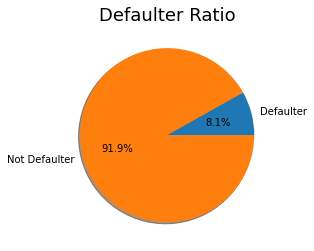

In [45]:
# Ploting Credit_default ratio
total_default_values = train_data.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

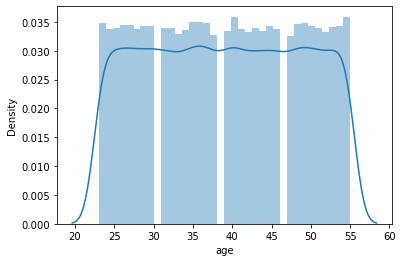

In [46]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(train_data['age'])
plt.show()

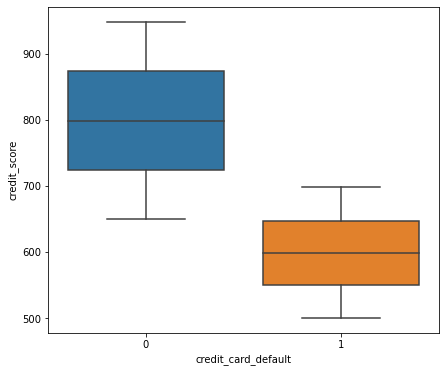

In [47]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(train_data['credit_card_default'], train_data['credit_score'])
plt.show()

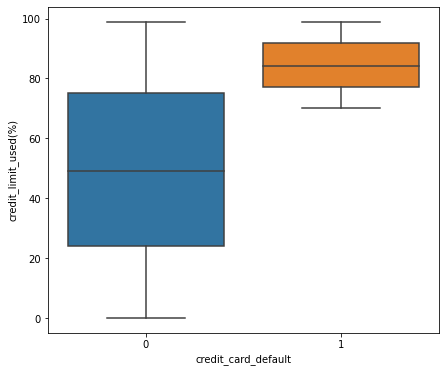

In [48]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(train_data['credit_card_default'], train_data['credit_limit_used(%)'])
plt.show()

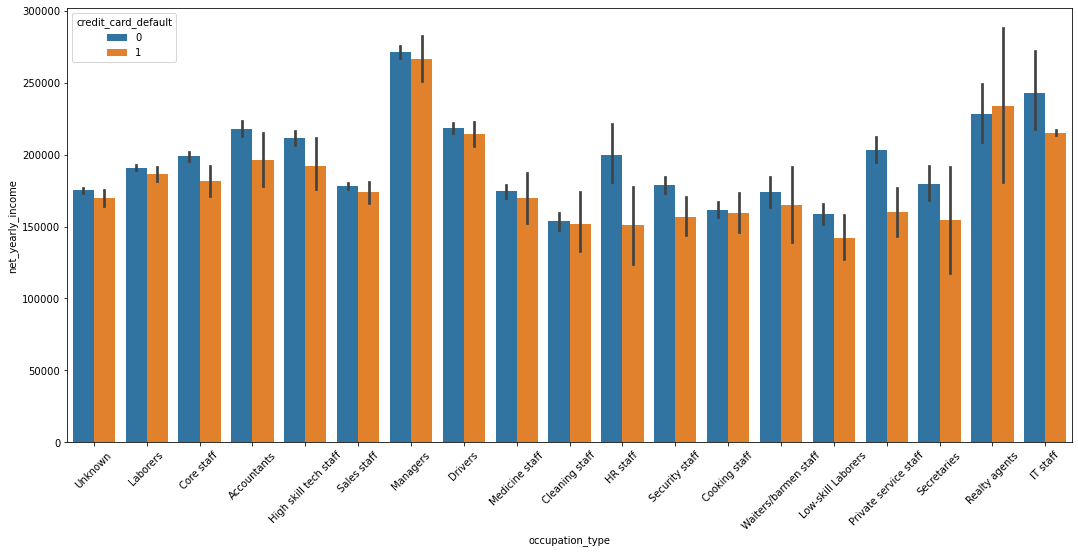

In [49]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=train_data['occupation_type'], y=train_data['net_yearly_income'], hue=train_data['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

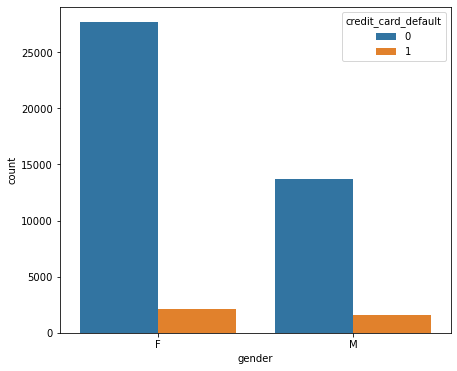

In [50]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(train_data['gender'], hue=train_data['credit_card_default'])
plt.show()

**Check outliers for continuous valued features**

In [51]:
train_data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default income_categories  
0                    1               Low  
1                    0               Low  
2                    0         Above Avg  
3                    0               Low  
4                    0              High

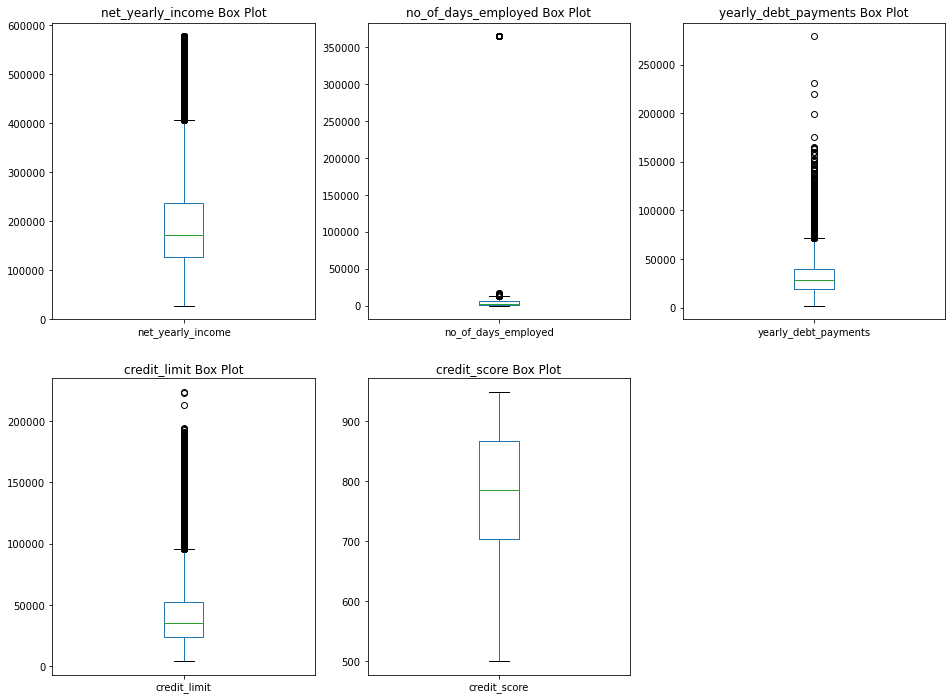

In [52]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
train_data['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_data['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_data['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_data['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_data['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

Check and treat outliers for 'net_yearly_income'

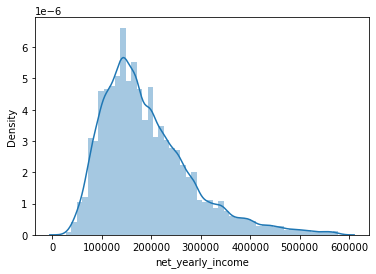

In [53]:
# net_yearly_income distribution plot
sns.distplot(train_data['net_yearly_income'])
plt.show()

In [54]:
train_data['net_yearly_income'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250    125824.5050
0.500    170968.0300
0.750    237768.9200
0.990    494553.0015
0.998    558422.4061
1.000    577850.1200
Name: net_yearly_income, dtype: float64

In [55]:
train_data[train_data['net_yearly_income']>train_data['net_yearly_income'].quantile(0.998)]

customer_id               name  age gender owns_car owns_house  \
1336   CST_144147              Leila   34      F        N          Y   
2288   CST_124731              Baker   23      F        Y          Y   
3188   CST_127738       Sam Forgione   42      F        N          Y   
3642   CST_109211  Dhanya Skariachan   39      F        N          Y   
4003   CST_117918  Antoni Slodkowski   53      F        N          N   
...           ...                ...  ...    ...      ...        ...   
43049  CST_130078           Caroline   34      F        Y          Y   
43641  CST_151413          Tsukimori   51      F        Y          Y   
44137  CST_156473              Clark   52      M        Y          N   
44533  CST_142776              Sarah   31      M        N          N   
44941  CST_103318       Joseph Silha   47      F        N          Y   

       no_of_children  net_yearly_income  no_of_days_employed occupation_type  \
1336              1.0          576455.38                607.0      Core staff   
2288              0.0          576182.88               2555.0  Medicine staff   
3188              0.0          560253.89                617.0         Unknown   
3642              0.0          574861.28             365248.0         Unknown   
4003              0.0          572190.87               2820.0         Unknown   
...               ...                ...                  ...             ...   
43049             1.0          571518.57               7003.0         Unknown   
43641             0.0          573405.99               6608.0      Core staff   
44137             0.0          575691.21                248.0        Managers   
44533             2.0          573360.32                386.0        Managers   
44941             2.0          571162.57               2718.0        Managers   

       total_family_members  migrant_worker  yearly_debt_payments  \
1336                    3.0             0.0             160536.46   
2288                    2.0             0.0              44769.94   
3188                    2.0             0.0              33267.52   
3642                    2.0             0.0              35382.93   
4003                    1.0             1.0              51490.55   
...                     ...             ...                   ...   
43049                   3.0             0.0             120623.69   
43641                   2.0             0.0              41199.81   
44137                   1.0             1.0              39062.36   
44533                   4.0             1.0              32790.24   
44941                   4.0             0.0              72731.38   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
1336      103710.75                    18         909.0              0   
2288      172739.21                     3         667.0              0   
3188      102291.99                    61         799.0              0   
3642      185726.94                    86         815.0              0   
4003      187427.47                    54         797.0              0   
...             ...                   ...           ...            ...   
43049      59254.08                    36         793.0              0   
43641      74282.75                    26         747.0              0   
44137      87003.89                     9         734.0              0   
44533     123748.64                    22         699.0              0   
44941      94699.00                    75         842.0              0   

       default_in_last_6months  credit_card_default income_categories  
1336                         0                    0              High  
2288                         0                    0              High  
3188                         0                    0              High  
3642                         0                    0              High  
4003                         0                    0              High  
...               

Remove the outlier that are more than 99.8% quantile or net_yearly_income

In [56]:
train_data = train_data[train_data['net_yearly_income']<=train_data['net_yearly_income'].quantile(0.998)]

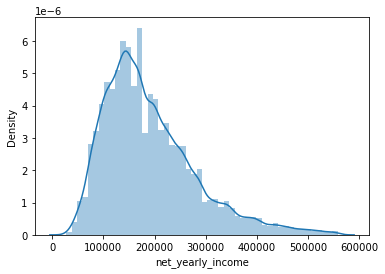

In [57]:
# net_yearly_income distribution plot
sns.distplot(train_data['net_yearly_income'])
plt.show()

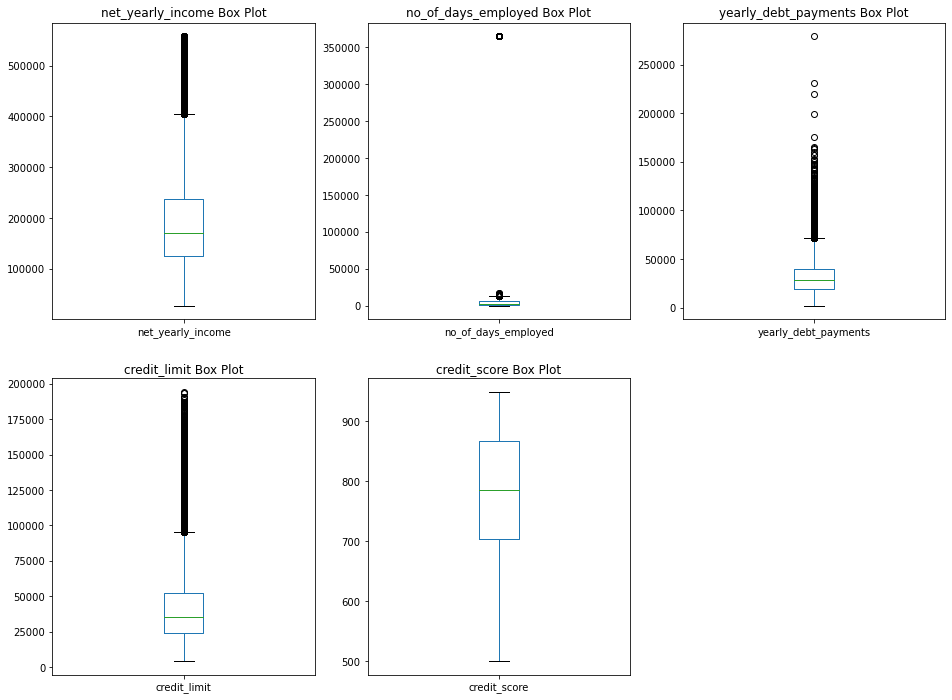

In [58]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
train_data['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_data['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_data['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_data['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_data['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

Check and treat outliers for 'no_of_days_employed'

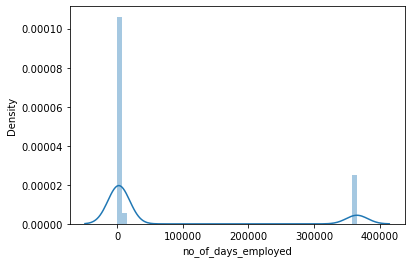

In [59]:
# no_of_days_employed distribution plot
sns.distplot(train_data['no_of_days_employed'])
plt.show()

In [60]:
train_data['no_of_days_employed'].quantile([0.25, 0.5, 0.75, 0.8185, 0.99, 1.0])

0.2500       945.0
0.5000      2207.0
0.7500      5903.0
0.8185    365240.0
0.9900    365252.0
1.0000    365252.0
Name: no_of_days_employed, dtype: float64

From the above no_of_days_employed feature, there are vales like 365252 days. Which means around 1000 years and makes no sense.
<br>
So removing those outliers also.

In [61]:
# check data greater than 81.85%ile of no_of_days_employed feature
new_trainTEST_data = train_data[train_data['no_of_days_employed']>train_data['no_of_days_employed'].quantile(0.8185)]
new_trainTEST_data

customer_id             name  age gender owns_car owns_house  \
12     CST_147654            Baker   39      F        N          Y   
29     CST_149142        ODonnell"   26      M        Y          N   
32     CST_119708      Anna Driver   32      M        Y          N   
45     CST_105775      Diane Bartz   50      F        Y          Y   
49     CST_130624          Anirban   24      M        N          N   
...           ...              ...  ...    ...      ...        ...   
45509  CST_160135         Sullivan   28      F        N          N   
45510  CST_116622     Fredrik Dahl   38      F        N          Y   
45512  CST_101246     Emily Kaiser   24      F        N          Y   
45513  CST_120555  "John ODonnell"   49      M        N          Y   
45521  CST_161068              Dye   48      F        N          Y   

       no_of_children  net_yearly_income  no_of_days_employed occupation_type  \
12                0.0           68421.10             365247.0         Unknown   
29                0.0          172067.42             365251.0         Unknown   
32                0.0          206413.69             365247.0         Unknown   
45                0.0          173396.95             365241.0         Unknown   
49                0.0           49095.08             365247.0         Unknown   
...               ...                ...                  ...             ...   
45509             0.0          109872.55             365252.0         Unknown   
45510             0.0           52827.82             365242.0         Unknown   
45512             0.0          140729.06             365251.0         Unknown   
45513             0.0          223193.44             365242.0         Unknown   
45521             0.0           89435.47             365249.0         Unknown   

       total_family_members  migrant_worker  yearly_debt_payments  \
12                      2.0             0.0              13781.53   
29                      2.0             0.0              24199.23   
32                      2.0             0.0              22419.59   
45                      1.0             0.0              10764.89   
49                      2.0             0.0              13738.47   
...                     ...             ...                   ...   
45509                   2.0             0.0              17022.95   
45510                   2.0             0.0              19245.70   
45512                   2.0             0.0              18350.70   
45513                   2.0             0.0              19881.38   
45521                   2.0             0.0              31233.88   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
12         17110.01                    72         643.0              1   
29         22155.88                    49         886.0              0   
32         74423.73                    72         766.0              0   
45         28296.94                     3         811.0              0   
49         11766.32                    90         891.0              0   
...             ...                   ...           ...            ...   
45509      23985.85                    56         798.0              0   
45510      13756.60                    13         907.0              0   
45512      15661.53                    27         752.0              0   
45513      48985.19                    72         940.0              0   
45521      21850.77                    36         879.0              0   

       default_in_last_6months  credit_card_default income_categories  
12                           1                    1               Low  
29                           0                    0         Above Avg  
32                           0                    0         Above Avg  
45                           0                    0         Above Avg  
49                           0                    0               Low  
...                        ...            

In [62]:
new_trainTEST_data.credit_card_default.value_counts(normalize=True)*100

0    94.52381
1     5.47619
Name: credit_card_default, dtype: float64

#### Check for anomalies in the new data set we have taken out

In [63]:
# get all categorical features of the new dataset
cols = train_data.columns 

for i in cols:
    if len(new_trainTEST_data[i].value_counts())<=20:
        print("Column Name:",i)
        print(new_trainTEST_data[i].value_counts())
        print("*"*50)

Column Name: gender
F    6137
M    1423
Name: gender, dtype: int64
**************************************************
Column Name: owns_car
N    6179
Y    1381
Name: owns_car, dtype: int64
**************************************************
Column Name: owns_house
Y    5683
N    1877
Name: owns_house, dtype: int64
**************************************************
Column Name: no_of_children
0.0    7286
1.0     205
2.0      53
3.0      14
5.0       1
4.0       1
Name: no_of_children, dtype: int64
**************************************************
Column Name: no_of_days_employed
365241.0    754
365246.0    683
365244.0    667
365245.0    628
365247.0    622
365250.0    608
365243.0    606
365251.0    605
365242.0    599
365249.0    598
365252.0    598
365248.0    592
Name: no_of_days_employed, dtype: int64
**************************************************
Column Name: occupation_type
Unknown    7560
Name: occupation_type, dtype: int64
**************************************************


In [64]:
new_trainTEST_data_final = train_data[train_data['no_of_days_employed']<=train_data['no_of_days_employed'].quantile(0.8185)]

In [65]:
new_trainTEST_data_final.credit_card_default.value_counts(normalize=True)*100

0    91.336415
1     8.663585
Name: credit_card_default, dtype: float64

**Let us remove those 20% of the outliers in our initial training and proceed with the remaining 81.85%ile as the the data imbalance percentage doesn't change even after droping those data points**

In [66]:
# remove outliers greater than 81.85%ile of no_of_days_employed
train_data = train_data[train_data['no_of_days_employed']<=train_data['no_of_days_employed'].quantile(0.8185)]

In [67]:
# check the shape of remaining data
train_data.shape

(37421, 20)

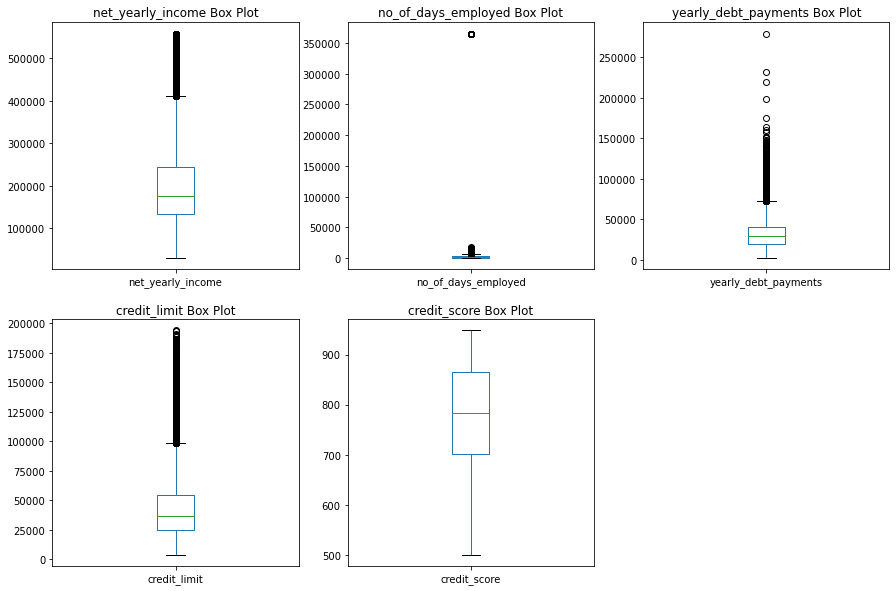

In [68]:
# boxplot of all continuous variables

plt.figure(figsize=[15, 10])
plt.subplot(2,3,1)
train_data['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_data['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_data['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_data['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_data['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

In [69]:
train_data.head()

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   

   credit_card_default income_categories  
0                    1               Low  
1                    0               Low  
2                    0         Above Avg  
3                    0               Low  
4                    0              High

### Data Preparation

In [70]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
train_data.drop(['customer_id', 'name'], axis=1, inplace=True)
train_data.head()

age gender owns_car owns_house  no_of_children  net_yearly_income  \
0   46      F        N          Y             0.0          107934.04   
1   29      M        N          Y             0.0          109862.62   
2   37      M        N          Y             0.0          230153.17   
3   39      F        N          Y             0.0          122325.82   
4   46      M        Y          Y             0.0          387286.00   

   no_of_days_employed occupation_type  total_family_members  migrant_worker  \
0                612.0         Unknown                   1.0             1.0   
1               2771.0        Laborers                   2.0             0.0   
2                204.0        Laborers                   2.0             0.0   
3              11941.0      Core staff                   2.0             0.0   
4               1459.0      Core staff                   1.0             0.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              33070.28      18690.93                    73         544.0   
1              15329.53      37745.19                    52         857.0   
2              48416.60      41598.36                    43         650.0   
3              22574.36      32627.76                    20         754.0   
4              38282.95      52950.64                    75         927.0   

   prev_defaults  default_in_last_6months  credit_card_default  \
0              2                        1                    1   
1              0                        0                    0   
2              0                        0                    0   
3              0                        0                    0   
4              0                        0                    0   

  income_categories  
0               Low  
1               Low  
2         Above Avg  
3               Low  
4              High

**Encode Categorical Column labels with value between 0 and n_classes-1**

In [71]:
lm = LabelEncoder()

# get categorical columns
cat_cols = train_data.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols:
    train_data[i] = lm.fit_transform(train_data[i])
    
train_data.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0   46       0         0           1             0.0          107934.04   
1   29       1         0           1             0.0          109862.62   
2   37       1         0           1             0.0          230153.17   
3   39       0         0           1             0.0          122325.82   
4   46       1         1           1             0.0          387286.00   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0                612.0               17                   1.0             1.0   
1               2771.0                8                   2.0             0.0   
2                204.0                8                   2.0             0.0   
3              11941.0                3                   2.0             0.0   
4               1459.0                3                   1.0             0.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              33070.28      18690.93                    73         544.0   
1              15329.53      37745.19                    52         857.0   
2              48416.60      41598.36                    43         650.0   
3              22574.36      32627.76                    20         754.0   
4              38282.95      52950.64                    75         927.0   

   prev_defaults  default_in_last_6months  credit_card_default  \
0              2                        1                    1   
1              0                        0                    0   
2              0                        0                    0   
3              0                        0                    0   
4              0                        0                    0   

   income_categories  
0                  3  
1                  3  
2                  0  
3                  3  
4                  2

## Train-Test Split

In [72]:
# split train-test data
X = train_data.drop(['credit_card_default'], axis=1)
y = train_data['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (26194, 17) (11227, 17)
y= (26194,) (11227,)


### Feature Scaling

In [73]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [74]:
X_train.head()

age  gender  owns_car  owns_house  no_of_children  \
33494  0.37500     0.0       0.0         0.0        0.111111   
45014  0.46875     1.0       0.0         1.0        0.000000   
3492   0.81250     0.0       0.0         1.0        0.000000   
38950  0.53125     0.0       0.0         1.0        0.000000   
3793   0.50000     0.0       0.0         1.0        0.000000   

       net_yearly_income  no_of_days_employed  occupation_type  \
33494           0.152219             0.002467         0.000000   
45014           0.317429             0.002869         0.444444   
3492            0.322998             0.003077         0.777778   
38950           0.215840             0.010111         0.944444   
3793            0.215873             0.008400         0.444444   

       total_family_members  migrant_worker  yearly_debt_payments  \
33494              0.222222             1.0              0.096273   
45014              0.111111             0.0              0.158336   
3492               0.000000             0.0              0.140594   
38950              0.111111             0.0              0.080930   
3793               0.111111             0.0              0.271049   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
33494      0.085426              0.545455      0.712695            0.0   
45014      0.156060              0.242424      0.351893            0.0   
3492       0.233354              0.949495      0.387528            0.0   
38950      0.115734              0.080808      0.407572            0.0   
3793       0.213307              0.151515      0.868597            0.0   

       default_in_last_6months  income_categories  
33494                      0.0           1.000000  
45014                      0.0           0.000000  
3492                       0.0           0.000000  
38950                      0.0           0.333333  
3793                       0.0           0.333333

#### Data Imbalance Handling

Using SMOTE method, we can balance the data w.r.t. credit_card_default variable and proceed further

In [75]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [76]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (47850, 17)
Dimension of y_train_sm Shape: (47850,)


In [77]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (47850, 17)
y_train.shape: (47850,)


age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0  0.37500     0.0       0.0         0.0        0.111111           0.152219   
1  0.46875     1.0       0.0         1.0        0.000000           0.317429   
2  0.81250     0.0       0.0         1.0        0.000000           0.322998   
3  0.53125     0.0       0.0         1.0        0.000000           0.215840   
4  0.50000     0.0       0.0         1.0        0.000000           0.215873   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0             0.002467         0.000000              0.222222             1.0   
1             0.002869         0.444444              0.111111             0.0   
2             0.003077         0.777778              0.000000             0.0   
3             0.010111         0.944444              0.111111             0.0   
4             0.008400         0.444444              0.111111             0.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              0.096273      0.085426              0.545455      0.712695   
1              0.158336      0.156060              0.242424      0.351893   
2              0.140594      0.233354              0.949495      0.387528   
3              0.080930      0.115734              0.080808      0.407572   
4              0.271049      0.213307              0.151515      0.868597   

   prev_defaults  default_in_last_6months  income_categories  
0            0.0                      0.0           1.000000  
1            0.0                      0.0           0.000000  
2            0.0                      0.0           0.000000  
3            0.0                      0.0           0.333333  
4            0.0                      0.0           0.333333

## Logistic Regression

In [78]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [79]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

**Prediction**

[[22709  1216]
 [  640 23285]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     23925
           1       0.95      0.97      0.96     23925

    accuracy                           0.96     47850
   macro avg       0.96      0.96      0.96     47850
weighted avg       0.96      0.96      0.96     47850

Accuracy of TRAIN data: 96.12121212121212
F1_Score of TRAIN data: 96.12064998696074
[[9792  462]
 [  39  934]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     10254
           1       0.67      0.96      0.79       973

    accuracy                           0.96     11227
   macro avg       0.83      0.96      0.88     11227
weighted avg       0.97      0.96      0.96     11227

Accuracy of TEST data: 95.53754342210742
F1_Score of TEST data: 88.1787187063675


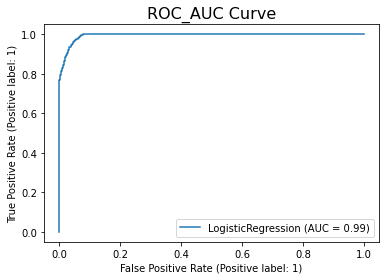

In [80]:
# prediction
evaluation(logreg)

## Random Forest

**Using Hyper-parameter Tuning**

In [81]:
# params = {
#     'max_depth': [10, 16, 20, 30],
#     'min_samples_leaf': [10, 30, 50, 80, 100],
#     'max_features': [14, 15, 16],
#     'n_estimators': [30, 50, 100, 200]}

# rfm_basic = RandomForestClassifier(random_state=42, oob_score=True)

# grid_search = GridSearchCV(estimator=rfm_basic, param_grid=params,
#                           cv=5, n_jobs=-1, verbose=1, scoring="accuracy")

In [82]:
# %%time
# grid_search.fit(X_train, y_train)

In [83]:
# rfm_best = grid_search.best_estimator_
# rfm_best

In [84]:
# # prediction and model evaluation
# evaluation(rfm_best)

## XGBoost Model

**Using Hyper-Parameter Tuning**

In [85]:
# hyperparameters
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [8, 10, 16, 20, 30],
              'min_child_weight': [10, 30, 50, 80, 100],
              'n_estimators': [50, 100, 150, 200, 300]}

# scorer = metrics.make_scorer(metrics.accuracy_score,
#                              greater_is_better=True,
#                              needs_proba=True,
#                              needs_threshold=False)
clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring='accuracy',
                                       refit=True)

clf_xgb.fit(X_train, y_train)

[19:52:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [86]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 30, 'min_child_weight': 10, 'n_estimators': 200}
0.9829467084639498
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=30,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[[23925     0]
 [    0 23925]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23925
           1       1.00      1.00      1.00     23925

    accuracy                           1.00     47850
   macro avg       1.00      1.00      1.00     47850
weighted avg       1.00      1.00      1.00     47850

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[10102   152]
 [  146   827]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10254
           1       0.84      0.85      0.85       973

    accuracy                           0.97     11227
   macro avg       0.92      0.92      0.92     11227
weighted avg       0.97      0.97      0.97     11227

Accuracy of TEST data: 97.3456845105549
F1_Score of TEST data: 91.64004491365097


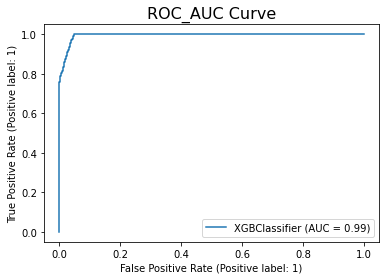

In [87]:
#prediction and evaluation
xgb_best_model = clf_xgb.best_estimator_
evaluation(xgb_best_model)

In [139]:
# hyperparameters Tuning-2
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)

parameters = {'learning_rate': [0.25, 0.3, 0.325, 0.35],
              'max_depth': [25, 30, 35, 40],
              'min_child_weight': [10, 15, 20],
              'n_estimators': [175, 200, 225, 250]}

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring='accuracy',
                                       refit=True)

clf_xgb.fit(X_train, y_train)

[20:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

[[23925     0]
 [    0 23925]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23925
           1       1.00      1.00      1.00     23925

    accuracy                           1.00     47850
   macro avg       1.00      1.00      1.00     47850
weighted avg       1.00      1.00      1.00     47850

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[10103   151]
 [  149   824]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10254
           1       0.85      0.85      0.85       973

    accuracy                           0.97     11227
   macro avg       0.92      0.92      0.92     11227
weighted avg       0.97      0.97      0.97     11227

Accuracy of TEST data: 97.32787031263918
F1_Score of TEST data: 91.56830143969482


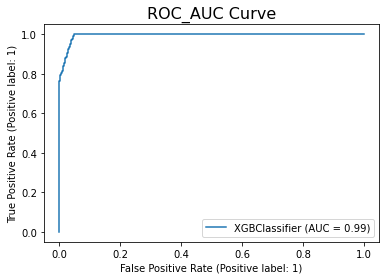

In [140]:
#prediction and evaluation after second parameter tuning-2
xgb_best_model = clf_xgb.best_estimator_
evaluation(xgb_best_model)

## Using ANN

In [88]:
# ANN Architecture
model = keras.Sequential([
    keras.layers.Dense(17, input_shape=(17,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [89]:
epochs=20
history = model.fit(X_train, y_train,epochs=epochs,
         validation_data=(X_test, y_test))

Epoch 1/20
1496/1496 [==============================] - 4s 1ms/step - loss: 0.1466 - accuracy: 0.9396 - val_loss: 0.0786 - val_accuracy: 0.9605
Epoch 2/20
1496/1496 [==============================] - 2s 1ms/step - loss: 0.0971 - accuracy: 0.9583 - val_loss: 0.1035 - val_accuracy: 0.9494
Epoch 3/20
1496/1496 [==============================] - 2s 2ms/step - loss: 0.0940 - accuracy: 0.9603 - val_loss: 0.0846 - val_accuracy: 0.9560
Epoch 4/20
1496/1496 [==============================] - 2s 1ms/step - loss: 0.0927 - accuracy: 0.9610 - val_loss: 0.0877 - val_accuracy: 0.9526
Epoch 5/20
1496/1496 [==============================] - 2s 2ms/step - loss: 0.0912 - accuracy: 0.9612 - val_loss: 0.0849 - val_accuracy: 0.9526
Epoch 6/20
1496/1496 [==============================] - 3s 2ms/step - loss: 0.0900 - accuracy: 0.9619 - val_loss: 0.0700 - val_accuracy: 0.9629
Epoch 7/20
1496/1496 [==============================] - 2s 2ms/step - loss: 0.0898 - accuracy: 0.9621 - val_loss: 0.0816 - val_accuracy:

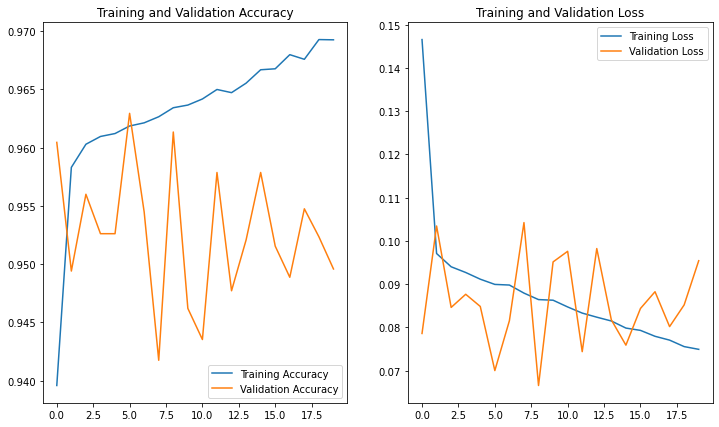

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [91]:
model.evaluate(X_test, y_test)

351/351 [==============================] - 0s 869us/step - loss: 0.0954 - accuracy: 0.9496


[0.09543143957853317, 0.9495857954025269]

In [92]:
y_pred_test = model.predict(X_test)
y_pred_test[:5]

array([[2.3171306e-04],
       [3.8979806e-07],
       [8.1118378e-06],
       [2.1949558e-14],
       [6.9800019e-04]], dtype=float32)

In [93]:
# converting 2D array to 1D array
y_pred_test = np.reshape(y_pred_test, len(y_pred_test))
y_pred_test[:10]

array([2.3171306e-04, 3.8979806e-07, 8.1118378e-06, 2.1949558e-14,
       6.9800019e-04, 1.0000000e+00, 7.8304744e-01, 3.9830293e-21,
       1.6392599e-07, 5.1920519e-15], dtype=float32)

In [94]:
# create a dataframe for the probabilities
new_evaluation_df = pd.DataFrame({'CustIDs': y_test.index, 'Defaulters': y_test.values, 'Default_Prob':y_pred_test})
new_evaluation_df.head()

CustIDs  Defaulters  Default_Prob
0    38967           0  2.317131e-04
1    44459           0  3.897981e-07
2    17243           0  8.111838e-06
3     7277           0  2.194956e-14
4    15892           0  6.980002e-04

In [95]:
# roc_auc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( new_evaluation_df.Defaulters, new_evaluation_df.Default_Prob, drop_intermediate = False )

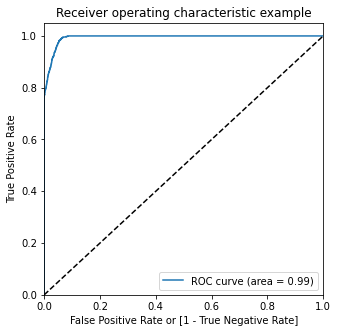

In [97]:
draw_roc(new_evaluation_df.Defaulters, new_evaluation_df.Default_Prob)

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    new_evaluation_df[i]= new_evaluation_df.Default_Prob.map(lambda x: 1 if x > i else 0)
new_evaluation_df.head()

CustIDs  Defaulters  Default_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0    38967           0  2.317131e-04    1    0    0    0    0    0    0    0   
1    44459           0  3.897981e-07    1    0    0    0    0    0    0    0   
2    17243           0  8.111838e-06    1    0    0    0    0    0    0    0   
3     7277           0  2.194956e-14    1    0    0    0    0    0    0    0   
4    15892           0  6.980002e-04    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(new_evaluation_df.Defaulters, new_evaluation_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086666  1.000000  0.000000
0.1   0.1  0.932217  0.995889  0.926175
0.2   0.2  0.938897  0.993834  0.933684
0.3   0.3  0.943351  0.988695  0.939048
0.4   0.4  0.946201  0.984584  0.942559
0.5   0.5  0.949586  0.981501  0.946557
0.6   0.6  0.951991  0.973279  0.949971
0.7   0.7  0.956890  0.952724  0.957285
0.8   0.8  0.966955  0.907503  0.972596
0.9   0.9  0.976663  0.797533  0.993661


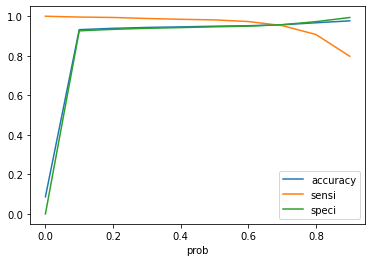

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Lets add probabilities from 0.6 to 0.7

In [101]:
numbers = [float(x)/100 for x in range(61,70)]
for i in numbers:
    new_evaluation_df[i]= new_evaluation_df.Default_Prob.map(lambda x: 1 if x > i else 0)
new_evaluation_df.head()

CustIDs  Defaulters  Default_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  ...  \
0    38967           0  2.317131e-04    1    0    0    0    0    0    0  ...   
1    44459           0  3.897981e-07    1    0    0    0    0    0    0  ...   
2    17243           0  8.111838e-06    1    0    0    0    0    0    0  ...   
3     7277           0  2.194956e-14    1    0    0    0    0    0    0  ...   
4    15892           0  6.980002e-04    1    0    0    0    0    0    0  ...   

   0.9  0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  
0    0     0     0     0     0     0     0     0     0     0  
1    0     0     0     0     0     0     0     0     0     0  
2    0     0     0     0     0     0     0     0     0     0  
3    0     0     0     0     0     0     0     0     0     0  
4    0     0     0     0     0     0     0     0     0     0  

[5 rows x 22 columns]

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70]
for i in num:
    cm1 = metrics.confusion_matrix(new_evaluation_df.Defaulters, new_evaluation_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.60  0.60  0.951991  0.973279  0.949971
0.61  0.61  0.952347  0.973279  0.950361
0.62  0.62  0.952525  0.971223  0.950751
0.63  0.63  0.953149  0.970195  0.951531
0.64  0.64  0.953149  0.966084  0.951921
0.65  0.65  0.953950  0.964029  0.952994
0.66  0.66  0.954663  0.964029  0.953774
0.67  0.67  0.955554  0.961973  0.954944
0.68  0.68  0.955910  0.959918  0.955530
0.69  0.69  0.956088  0.955807  0.956115
0.70  0.70  0.956890  0.952724  0.957285


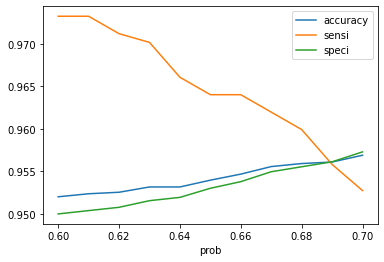

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above graph the cutoff point could be around **prob=0.675**

In [104]:
# setting cutoff point at 0.675
new_evaluation_df['0.675']= new_evaluation_df.Default_Prob.map(lambda x: 1 if x > 0.675 else 0)
new_evaluation_df.head()

CustIDs  Defaulters  Default_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  ...  \
0    38967           0  2.317131e-04    1    0    0    0    0    0    0  ...   
1    44459           0  3.897981e-07    1    0    0    0    0    0    0  ...   
2    17243           0  8.111838e-06    1    0    0    0    0    0    0  ...   
3     7277           0  2.194956e-14    1    0    0    0    0    0    0  ...   
4    15892           0  6.980002e-04    1    0    0    0    0    0    0  ...   

   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.675  
0     0     0     0     0     0     0     0     0     0      0  
1     0     0     0     0     0     0     0     0     0      0  
2     0     0     0     0     0     0     0     0     0      0  
3     0     0     0     0     0     0     0     0     0      0  
4     0     0     0     0     0     0     0     0     0      0  

[5 rows x 23 columns]

## Predict on Actual TEST Data

In [105]:
test_data.head()

customer_id          name  age gender owns_car owns_house  no_of_children  \
0  CST_142525          Siva   52      F        Y          N             0.0   
1  CST_129215         Scott   48      F        N          N             1.0   
2  CST_138443      Victoria   50      F        N          N             1.0   
3  CST_123812  John McCrank   30      F        N          N             1.0   
4  CST_144450      Martinne   52      M        N          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          232640.53                998.0         Unknown   
1          284396.79               1338.0         Unknown   
2          149419.28               1210.0         Unknown   
3          160437.54                503.0        Laborers   
4          233480.37                157.0        Laborers   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   2.0             0.0              14406.73      26524.40   
1                   3.0             0.0              57479.99      68998.72   
2                   3.0             0.0              21611.01      25187.80   
3                   2.0             1.0              28990.76      29179.39   
4                   2.0             1.0              54213.72      82331.82   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  
0                     4         779.0              0                        0  
1                    70         806.0              0                        0  
2                    71         528.0              2                        0  
3                     9         815.0              0                        0  
4                    82         613.0              1                        1

In [106]:
test_data.shape

(11383, 18)

In [107]:
test_data.isna().mean()*100

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.159624
owns_house                 0.000000
no_of_children             1.669156
net_yearly_income          0.000000
no_of_days_employed        0.922428
occupation_type            0.000000
total_family_members       0.272336
migrant_worker             0.228411
yearly_debt_payments       0.193271
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.026355
prev_defaults              0.000000
default_in_last_6months    0.000000
dtype: float64

In [108]:
test_data.isna().sum().sort_values(ascending=False).head(10)

no_of_children          190
owns_car                132
no_of_days_employed     105
total_family_members     31
migrant_worker           26
yearly_debt_payments     22
credit_score              3
customer_id               0
prev_defaults             0
credit_limit_used(%)      0
dtype: int64

impute <i>no_of_children</i> with mode of the data

impute <i>owns_car</i> using mode of the data

impute <i>no_of_days_employed</i> using median of the data

In [109]:
# fill no_of_children with mode of the data
test_data['no_of_children'].fillna(test_data['no_of_children'].mode()[0], inplace=True)

# fill owns_car with mode of the data
test_data['owns_car'].fillna(test_data['owns_car'].mode()[0], inplace=True)

# fill no_of_days_employed with median of the data
test_data['no_of_days_employed'].fillna(test_data['no_of_days_employed'].median(), inplace=True)

impute <i>total_family_members</i> with mode, <i>migrant_worker</i> with mode, <i>yearly_debt_payments</i> with median and <i>credit_score</i> with median

In [110]:
# fillna wrt to their medians and modes
test_data['total_family_members'].fillna(test_data['total_family_members'].mode()[0], inplace=True)
test_data['migrant_worker'].fillna(test_data['migrant_worker'].mode()[0], inplace=True)
test_data['yearly_debt_payments'].fillna(test_data['yearly_debt_payments'].median(), inplace=True)
test_data['credit_score'].fillna(test_data['credit_score'].median(), inplace=True)

In [111]:
# check for null values
test_data.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [112]:
test_data.head()

customer_id          name  age gender owns_car owns_house  no_of_children  \
0  CST_142525          Siva   52      F        Y          N             0.0   
1  CST_129215         Scott   48      F        N          N             1.0   
2  CST_138443      Victoria   50      F        N          N             1.0   
3  CST_123812  John McCrank   30      F        N          N             1.0   
4  CST_144450      Martinne   52      M        N          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          232640.53                998.0         Unknown   
1          284396.79               1338.0         Unknown   
2          149419.28               1210.0         Unknown   
3          160437.54                503.0        Laborers   
4          233480.37                157.0        Laborers   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   2.0             0.0              14406.73      26524.40   
1                   3.0             0.0              57479.99      68998.72   
2                   3.0             0.0              21611.01      25187.80   
3                   2.0             1.0              28990.76      29179.39   
4                   2.0             1.0              54213.72      82331.82   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  
0                     4         779.0              0                        0  
1                    70         806.0              0                        0  
2                    71         528.0              2                        0  
3                     9         815.0              0                        0  
4                    82         613.0              1                        1

In [113]:
# get all categorical features
cols = test_data.columns 

for i in cols:
    if len(test_data[i].value_counts())<=20:
        print("Column Name:",i)
        print(test_data[i].value_counts())
        print("*"*50)

Column Name: gender
F      7443
M      3939
XNA       1
Name: gender, dtype: int64
**************************************************
Column Name: owns_car
N    7504
Y    3879
Name: owns_car, dtype: int64
**************************************************
Column Name: owns_house
Y    7861
N    3522
Name: owns_house, dtype: int64
**************************************************
Column Name: no_of_children
0.0     8015
1.0     2248
2.0      957
3.0      138
4.0       19
5.0        4
11.0       1
7.0        1
Name: no_of_children, dtype: int64
**************************************************
Column Name: occupation_type
Unknown                  3546
Laborers                 2071
Sales staff              1176
Core staff               1018
Managers                  806
Drivers                   703
High skill tech staff     405
Accountants               365
Medicine staff            318
Security staff            252
Cooking staff             208
Cleaning staff            164
Private ser

In [114]:
test_data[test_data['gender'] == 'XNA']

customer_id name  age gender owns_car owns_house  no_of_children  \
3510  CST_141289  Jan   25    XNA        Y          Y             0.0   

      net_yearly_income  no_of_days_employed occupation_type  \
3510          219109.11              10041.0         Unknown   

      total_family_members  migrant_worker  yearly_debt_payments  \
3510                   2.0             0.0              22295.99   

      credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
3510      27709.34                     3         807.0              0   

      default_in_last_6months  
3510                        0

In [115]:
# lets impute with F as its mode of the feature
test_data['gender'] = test_data['gender'].apply(lambda x: 'F' if x=='XNA' else x)
test_data['gender'].value_counts()

F    7444
M    3939
Name: gender, dtype: int64

In [116]:
# get the cutomer_id column to new dataframe and drop in the original data fram
final_df = pd.DataFrame(test_data.customer_id)

In [117]:
test_data.drop(['customer_id', 'name'], axis=1, inplace=True)
test_data.head()

age gender owns_car owns_house  no_of_children  net_yearly_income  \
0   52      F        Y          N             0.0          232640.53   
1   48      F        N          N             1.0          284396.79   
2   50      F        N          N             1.0          149419.28   
3   30      F        N          N             1.0          160437.54   
4   52      M        N          Y             0.0          233480.37   

   no_of_days_employed occupation_type  total_family_members  migrant_worker  \
0                998.0         Unknown                   2.0             0.0   
1               1338.0         Unknown                   3.0             0.0   
2               1210.0         Unknown                   3.0             0.0   
3                503.0        Laborers                   2.0             1.0   
4                157.0        Laborers                   2.0             1.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              14406.73      26524.40                     4         779.0   
1              57479.99      68998.72                    70         806.0   
2              21611.01      25187.80                    71         528.0   
3              28990.76      29179.39                     9         815.0   
4              54213.72      82331.82                    82         613.0   

   prev_defaults  default_in_last_6months  
0              0                        0  
1              0                        0  
2              2                        0  
3              0                        0  
4              1                        1

In [118]:
# binning of net_yearly_income into categories
def income_binning(x):
    if x <= 125824.5050:
        return 'Low'
    elif x > 125824.5050 and x <= 170968.0300:
        return 'Below Avg'
    elif x > 170968.0300 and x <= 237768.9200:
        return 'Above Avg'
    else:
        return 'High'


In [119]:
test_data['income_categories'] = test_data.net_yearly_income.apply(income_binning)

In [120]:
test_data.head()

age gender owns_car owns_house  no_of_children  net_yearly_income  \
0   52      F        Y          N             0.0          232640.53   
1   48      F        N          N             1.0          284396.79   
2   50      F        N          N             1.0          149419.28   
3   30      F        N          N             1.0          160437.54   
4   52      M        N          Y             0.0          233480.37   

   no_of_days_employed occupation_type  total_family_members  migrant_worker  \
0                998.0         Unknown                   2.0             0.0   
1               1338.0         Unknown                   3.0             0.0   
2               1210.0         Unknown                   3.0             0.0   
3                503.0        Laborers                   2.0             1.0   
4                157.0        Laborers                   2.0             1.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              14406.73      26524.40                     4         779.0   
1              57479.99      68998.72                    70         806.0   
2              21611.01      25187.80                    71         528.0   
3              28990.76      29179.39                     9         815.0   
4              54213.72      82331.82                    82         613.0   

   prev_defaults  default_in_last_6months income_categories  
0              0                        0         Above Avg  
1              0                        0              High  
2              2                        0         Below Avg  
3              0                        0         Below Avg  
4              1                        1         Above Avg

### Data Preparation

#### Label Encoding

In [121]:
# get categorical columns
cat_cols_test = test_data.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols_test:
    test_data[i] = lm.fit_transform(test_data[i])
    
test_data.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0   52       0         1           0             0.0          232640.53   
1   48       0         0           0             1.0          284396.79   
2   50       0         0           0             1.0          149419.28   
3   30       0         0           0             1.0          160437.54   
4   52       1         0           1             0.0          233480.37   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0                998.0               17                   2.0             0.0   
1               1338.0               17                   3.0             0.0   
2               1210.0               17                   3.0             0.0   
3                503.0                8                   2.0             1.0   
4                157.0                8                   2.0             1.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              14406.73      26524.40                     4         779.0   
1              57479.99      68998.72                    70         806.0   
2              21611.01      25187.80                    71         528.0   
3              28990.76      29179.39                     9         815.0   
4              54213.72      82331.82                    82         613.0   

   prev_defaults  default_in_last_6months  income_categories  
0              0                        0                  0  
1              0                        0                  2  
2              2                        0                  1  
3              0                        0                  1  
4              1                        1                  0

In [122]:
test_data.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0   52       0         1           0             0.0          232640.53   
1   48       0         0           0             1.0          284396.79   
2   50       0         0           0             1.0          149419.28   
3   30       0         0           0             1.0          160437.54   
4   52       1         0           1             0.0          233480.37   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0                998.0               17                   2.0             0.0   
1               1338.0               17                   3.0             0.0   
2               1210.0               17                   3.0             0.0   
3                503.0                8                   2.0             1.0   
4                157.0                8                   2.0             1.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              14406.73      26524.40                     4         779.0   
1              57479.99      68998.72                    70         806.0   
2              21611.01      25187.80                    71         528.0   
3              28990.76      29179.39                     9         815.0   
4              54213.72      82331.82                    82         613.0   

   prev_defaults  default_in_last_6months  income_categories  
0              0                        0                  0  
1              0                        0                  2  
2              2                        0                  1  
3              0                        0                  1  
4              1                        1                  0

In [123]:
cols_test = test_data.columns
cols_test

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'income_categories'],
      dtype='object')

#### Feature Scaling

In [124]:
cols_test = test_data.columns

test_data[cols_test] = scaler.transform(test_data[cols_test])
test_data.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0  0.90625     0.0       1.0         0.0        0.000000           0.384499   
1  0.78125     0.0       0.0         0.0        0.111111           0.482314   
2  0.84375     0.0       0.0         0.0        0.111111           0.227219   
3  0.21875     0.0       0.0         0.0        0.111111           0.248043   
4  0.90625     1.0       0.0         1.0        0.000000           0.386087   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0             0.002727         0.944444              0.111111             0.0   
1             0.003658         0.944444              0.222222             0.0   
2             0.003307         0.944444              0.222222             0.0   
3             0.001372         0.444444              0.111111             1.0   
4             0.000424         0.444444              0.111111             1.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              0.043927      0.118874              0.040404      0.621381   
1              0.199408      0.343462              0.707071      0.681514   
2              0.069932      0.111807              0.717172      0.062361   
3              0.096571      0.132913              0.090909      0.701559   
4              0.187618      0.413962              0.828283      0.251670   

   prev_defaults  default_in_last_6months  income_categories  
0            0.0                      0.0           0.000000  
1            0.0                      0.0           0.666667  
2            1.0                      0.0           0.333333  
3            0.0                      0.0           0.333333  
4            0.5                      1.0           0.000000

#### Logitic Regression Prediction

In [125]:
predicted_target = logreg.predict(test_data)
predicted_target[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [126]:
final_df['credit_card_default'] = predicted_target

In [127]:
final_df.head()

customer_id  credit_card_default
0  CST_142525                    0
1  CST_129215                    0
2  CST_138443                    1
3  CST_123812                    0
4  CST_144450                    1

In [128]:
# # save it to file and submit
# final_df.to_csv('LogRegg_submission.csv', index=False)
# print('Output Saved to CSV File!!')

#### Random Forest Prediction

In [129]:
# random_final_df = pd.DataFrame(final_df['customer_id'])

# random_predicted_target = rfm_best.predict(test_data)
# random_predicted_target[:10]

In [130]:
# random_final_df['credit_card_default'] = random_predicted_target

In [131]:
# random_final_df.head()

In [132]:
# # save it to file and submit
# random_final_df.to_csv('RandomForest_submission.csv', index=False)
# print('Output Saved to CSV File!!')

## Here We came to know that both outputs generated by LogReg and RandomForest are same.

#### XGBoost Prediction

In [141]:
xgboost_final_df = pd.DataFrame(final_df['customer_id'])

xgboost_predicted_target = xgb_best_model.predict(test_data)
xgboost_predicted_target[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [142]:
xgboost_final_df['credit_card_default'] = xgboost_predicted_target
xgboost_final_df.head()

customer_id  credit_card_default
0  CST_142525                    0
1  CST_129215                    0
2  CST_138443                    1
3  CST_123812                    0
4  CST_144450                    1

In [143]:
# # save it to file and submit
# xgboost_final_df.to_csv('XGBoost_submission2.csv', index=False)
# print('Output Saved to CSV File!!')

Output Saved to CSV File!!


#### Artificical Neural Networks Prediction

In [136]:
# ann_final_df = pd.DataFrame(final_df['customer_id'])

# ann_predicted_probs = model.predict(test_data)

# # converting 2D array to 1D array
# ann_predicted_probs = np.reshape(ann_predicted_probs, len(ann_predicted_probs))
# ann_predicted_probs[:10]

In [137]:
# ann_final_df['ann_probs'] = ann_predicted_probs

# # setting optimal cutoff of 0.675
# ann_final_df['credit_card_default']= ann_final_df.ann_probs.map(lambda x: 1 if x > 0.675 else 0)

# # drop 'ann_probs' column
# ann_final_df.drop('ann_probs', axis=1, inplace=True)
# ann_final_df.head()

In [138]:
# # save it to file and submit
# ann_final_df.to_csv('ANeuralNets_submission.csv', index=False)
# print('Output Saved to CSV File!!')